# ProdMX : Rapid Query and Analysis of Protein Functional Domain based on Compressed Sparse Matries

GitHub: https://github.com/visanuwan/prodmx

## Example 2 : Identifying and extracting of toxin genes from *C. difficile* and *C. botulinum* genomes

## 1. Installation

This section covers the basic installation of ProdMX from source code in our GitHub repository.<br>User can initiate the installation process from the pip installer with the path to the downloaded folder of ProdMx source code.

In [ ]:
%%bash

python -m pip install /path/to/prodmx

## 2. Analyses using ProdMX

### The gene cluster of toxin genes in *C. difficile* and *C. botulinum*

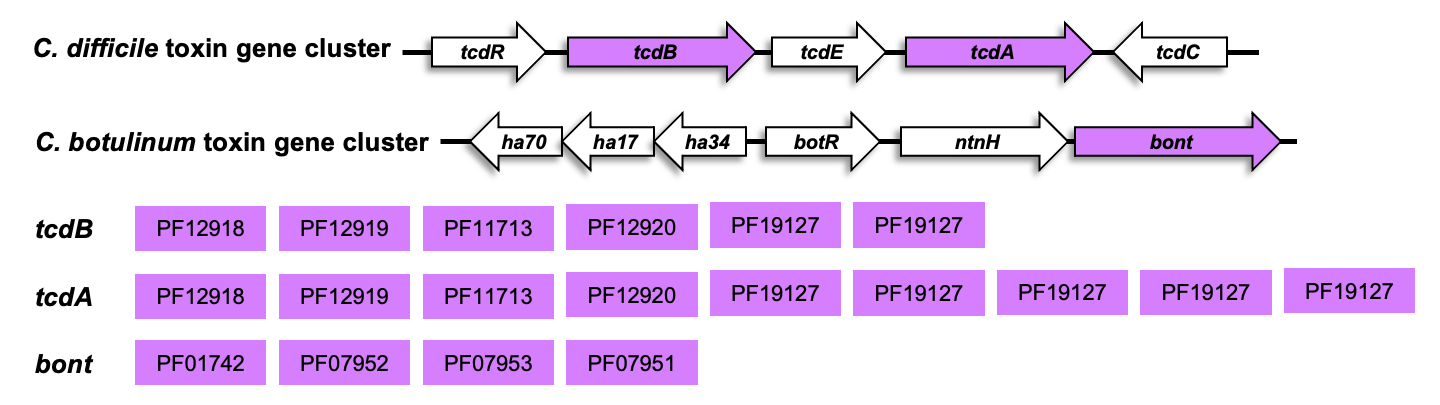

### 2.1 Exotoxins from *C. difficile*

*Clostridioides difficile* or formerly known as *Clostridium difficile* is a group of bacteria that cause severe damage to the colon with diarrhea symptoms. This gram-positive species is one of the most common bacteria found in healthcare-associated infections (HAIs) in the United States. The exotoxin gene cluster in *C. difficile* organize by two toxin genes *TcdA* and *TcdB*. These two exotoxin genes are regulated by the alternative RNA polymerase sigma factor *TcdR*.
<br>To demonstrate the potential use case for screening, the ProdMX were employed to the identify the pathogenicity of unknown genome sequences from Clostridiales order.
<br>The data used in the demonstration can be found in a `test/example_2` folder in the ProdMX repository.

In [ ]:
import os
prodmx_test_folder = "/path/to/prodmx/test/example_2"
os.chdir(prodmx_test_folder)

Like the example 1, we need to go through the steps of creating a compress sparse matrix of the HMMER results for all genomes of interest. However, for the protein analysis, we need to construct the matrix of domain architectures since the order of functional domains within a protein can result in different gene function. The code to generate the compressed sparse matrix of domain architectures is as follows.

In [ ]:
%%bash

prodmx-buildArchitecture -i input_clostridiales_id_hmm.tsv -o architecture_matrix_fol -k

To count all virulence factors, the following codes were used to load the non-binary compressed sparse matrix of domain architectures to the python environment.

In [ ]:
import prodmx
import pandas as pd

count_matrix = prodmx.loadMatrix(matrix_fol='architecture_matrix_fol')

To check for exotoxin genes, we retrieved the domain architectures from [UniProt](https://www.uniprot.org/) for *TcdA* and *TcdB* protein. The dictionary between protein name and domain architectures were created as follows.

In [ ]:
dict_tox = {'tcdB':'PF12918_PF12919_PF11713_PF12920_PF19127_PF19127',
            'tcdA':'PF12918_PF12919_PF11713_PF12920_PF19127_PF19127_PF19127_PF19127_PF19127'}

Using Pandas DataFame, we can create the data table for the in silico-screening of exotoxin in the unknown genomes by the code following:

In [ ]:
list_result = []
for genome_id in count_matrix.getRow():
    x = count_matrix.sumColumn(list_row=[genome_id],
                               list_col=[dict_tox.get('tcdB'),
                                         dict_tox.get('tcdA')])['col_sum'].tolist()
    list_result.append([genome_id]+x)

header=['genome_id', 'tcdB', 'tcdA']
pd.DataFrame(list_result, columns=header)

The table of genome and protein ids associating with exotoxins can be retrieved as follows:

In [ ]:
count_matrix.getProteinId(list_row=count_matrix.getRow(),
                          list_col=[dict_tox.get('tcdB'), dict_tox.get('tcdA')],
                          output='clostridiales_exotoxin_protein_id.txt')

### 2.2 Neurotoxins from *C. botulinum*

The botulinum neurotoxins (BoNTs) produced by the strains of *Clostridium botulinum* can cause the disease botulism which is a potentially fatal disease in human. This neurotoxin gene cluster in *C. botulinum* comprise of *ntnh* and *bont* genes with the alternative sigma factor *botR* to regulate the expression. <br>Referring to the steps in the previous example of exotoxins, we can use the same domain architecture matrix to retrieve the potential genomes and protein ids that might associate with botulinum neurotoxins by following code:

In [ ]:
dict_tox = {'bont': 'PF01742_PF07952_PF07953_PF07951'}

In [ ]:
count_matrix.getProteinId(list_row=count_matrix.getRow(),
                          list_col=[ dict_tox.get('bont'),
                                    output='clostridiales_neurotoxin_protein_id.txt')                                                         